In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix,cohen_kappa_score,log_loss
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

%matplotlib inline

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.feature_selection import RFE,f_classif,SelectKBest,chi2
from sklearn.preprocessing import PowerTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind

from matplotlib.colors import ListedColormap

pd.options.display.max_columns = None
pd.options.display.max_rows = None
from scipy import stats

In [2]:
xtrain = pd.read_csv('xtrain_final.csv')
xtest = pd.read_csv('xtest_final.csv')
ytrain = pd.read_csv('ytrain_final.csv')
ytest = pd.read_csv('ytest_final.csv')

In [3]:
def q(x) :
    if x < 4 :
        return('Q2')
    elif (x>=4) & (x<7) :
        return('Q3')
    elif (x>=7) & (x<10) :
        return('Q4')
    else :
        return('Q1')

In [4]:
xtrain['Lead_Quarter'] = xtrain.Lead_Creation_Month.map(q)
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Lead_Quarter
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.4,18.040,40.8,646,0.384524,0.879263,1,0,0,Q4
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,Q3
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.4,15.108,52.8,2344,0.450769,1.266409,1,0,0,Q4
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,Q1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,Q4


In [5]:
xtrain['Loan_Period'] = np.round(xtrain.Loan_Period)
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Lead_Quarter
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,Q4
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,Q3
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,Q4
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,Q1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,Q4


In [6]:
xtest['Lead_Quarter'] = xtest.Lead_Creation_Month.map(q)
xtest['Loan_Period'] = np.round(xtest.Loan_Period)
xtest.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Lead_Quarter
0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195,0,0,0,Q4
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1000.0,0.0,27000,5.0,18.950,57.6,717,0.717000,1.952378,1,0,0,Q4
2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986,0,0,0,Q3
3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534,1,0,0,Q1
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630,0,1,0,Q4


In [7]:
dum_quarter_train = pd.get_dummies(xtrain.Lead_Quarter, drop_first = True)

In [8]:
xtrain_rest = xtrain.iloc[:,:37]
xtrain_rest = xtrain_rest.reset_index(drop = True)

In [9]:
dum_quarter_test = pd.get_dummies(xtest.Lead_Quarter, drop_first = True)

In [10]:
dum_quarter_train = dum_quarter_train.reset_index(drop = True)
dum_quarter_test = dum_quarter_test.reset_index(drop = True)

In [11]:
xtest_rest = xtest.iloc[:,:37]
xtest_rest = xtest_rest.reset_index(drop = True)

In [12]:
xtrain_final = pd.concat([xtrain_rest,dum_quarter_train], axis = 1)

In [13]:
xtest_final = pd.concat([xtest_rest,dum_quarter_test], axis = 1)

In [14]:
xtrain_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,0,0,0
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,0,0,1


In [15]:
xtrain_final.shape

(52270, 40)

In [16]:
xtest_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1000.0,0.0,27000,5.0,18.950,57.6,717,0.717000,1.952378,1,0,0,0,0,1
2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986,0,0,0,0,1,0
3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630,0,1,0,0,0,1


In [17]:
xtest_final.shape

(13068, 40)

In [18]:
Xtrain = xtrain_final.drop('Lead_Creation_Month', axis=1)
Xtest = xtest_final.drop('Lead_Creation_Month', axis=1)

In [19]:
Xtrain.shape

(52270, 39)

In [20]:
Xtest.shape

(13068, 39)

In [21]:
data = pd.read_csv('train.csv')
y = data.Approved

In [22]:
ytrain.shape

(52270, 1)

In [23]:
ytest.shape

(13068, 1)

### Feature Selection Techniques

#### 1. SelectKBest

In [26]:
## Using f_classif (Anova-F technique)
select_features1 = SelectKBest(f_classif, k=39)
select_features1.fit_transform(Xtrain, ytrain)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [27]:
select_features1.scores_

array([1.28316383e+02, 1.31170013e+02, 6.99665905e+01, 9.64280616e-03,
       3.13825481e+01, 1.99637457e+01, 3.87611733e+01, 1.10459191e+00,
       7.98753464e+00, 5.52636898e+00, 9.74392879e-02, 1.79542675e-02,
       2.56873310e+00, 5.44692809e+01, 1.17227230e+00, 1.00809641e+02,
       1.42188202e+01, 1.20966346e+01, 3.27741867e+00, 4.97122717e+01,
       1.49822446e+01, 6.32899943e+02, 2.25175739e+01, 1.20895614e+01,
       1.35216721e-02, 1.86670181e+02, 1.89155691e+02, 2.37689981e+00,
       4.35168725e+02, 1.83979934e+00, 1.81104141e+02, 1.37047709e+00,
       1.32433095e+00, 2.77693195e+00, 2.26364305e+01, 2.05508262e+02,
       4.91946482e-02, 4.61587376e+00, 6.44639853e-01])

In [28]:
select_features1.pvalues_

array([1.03658789e-029, 2.47052423e-030, 6.17861847e-017, 9.21775613e-001,
       2.12939953e-008, 7.90899007e-006, 4.82590217e-010, 2.93265436e-001,
       4.71183756e-003, 1.87356339e-002, 7.54925747e-001, 8.93408202e-001,
       1.09001033e-001, 1.60234707e-013, 2.78939831e-001, 1.06401367e-023,
       1.62913850e-004, 5.05539801e-004, 7.02450615e-002, 1.80229308e-012,
       1.08659327e-004, 7.87290796e-139, 2.08779550e-006, 5.07460782e-004,
       9.07428923e-001, 2.00528053e-042, 5.77503926e-043, 1.23147762e-001,
       3.01253302e-096, 1.74980326e-001, 3.25888195e-041, 2.41735268e-001,
       2.49821523e-001, 9.56371954e-002, 1.96259698e-006, 1.60781351e-046,
       8.24471485e-001, 3.16819329e-002, 4.22039267e-001])

In [29]:
## Selecting features with p-value < 5%

sel_kbest = pd.DataFrame({'Features':Xtrain.columns,'P_Val':select_features1.pvalues_})
sel_kbest.loc[sel_kbest.P_Val<0.05,:].Features

0                   Gender
1                Contacted
2        Primary_Bank_Type
4          City_Category_C
5     Employer_Category1_B
6     Employer_Category1_C
8        Source_Category_C
9        Source_Category_D
13     Age_Cat_Middle-Aged
15           Age_Cat_Young
16       Employer_Cat3_MSF
17      Employer_Cat3_MSME
19       Employer_Cat3_VSF
20      Employer_Category2
21                    Var1
22               City_Code
23                  Source
25            Existing_EMI
26             Loan_Amount
28           Interest_Rate
30               emi_recal
34                IR_20-25
35                  IR_25+
37                      Q3
Name: Features, dtype: object

In [31]:
## Here chi2 as a SelectKBest technique can't be used because of presence of negative values encoded via WOE in City Code and Source

In [32]:
select_features2 = SelectKBest(f_classif, k=20)
select_features2.fit_transform(Xtrain, ytrain)

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 6.460e+02, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 7.950e+02, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.344e+03, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.392e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 4.770e+02, 0.000e+00,
        1.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.050e+03, 0.000e+00,
        0.000e+00]])

In [33]:
select_features2.scores_

array([1.28316383e+02, 1.31170013e+02, 6.99665905e+01, 9.64280616e-03,
       3.13825481e+01, 1.99637457e+01, 3.87611733e+01, 1.10459191e+00,
       7.98753464e+00, 5.52636898e+00, 9.74392879e-02, 1.79542675e-02,
       2.56873310e+00, 5.44692809e+01, 1.17227230e+00, 1.00809641e+02,
       1.42188202e+01, 1.20966346e+01, 3.27741867e+00, 4.97122717e+01,
       1.49822446e+01, 6.32899943e+02, 2.25175739e+01, 1.20895614e+01,
       1.35216721e-02, 1.86670181e+02, 1.89155691e+02, 2.37689981e+00,
       4.35168725e+02, 1.83979934e+00, 1.81104141e+02, 1.37047709e+00,
       1.32433095e+00, 2.77693195e+00, 2.26364305e+01, 2.05508262e+02,
       4.91946482e-02, 4.61587376e+00, 6.44639853e-01])

In [34]:
select_features2.pvalues_

array([1.03658789e-029, 2.47052423e-030, 6.17861847e-017, 9.21775613e-001,
       2.12939953e-008, 7.90899007e-006, 4.82590217e-010, 2.93265436e-001,
       4.71183756e-003, 1.87356339e-002, 7.54925747e-001, 8.93408202e-001,
       1.09001033e-001, 1.60234707e-013, 2.78939831e-001, 1.06401367e-023,
       1.62913850e-004, 5.05539801e-004, 7.02450615e-002, 1.80229308e-012,
       1.08659327e-004, 7.87290796e-139, 2.08779550e-006, 5.07460782e-004,
       9.07428923e-001, 2.00528053e-042, 5.77503926e-043, 1.23147762e-001,
       3.01253302e-096, 1.74980326e-001, 3.25888195e-041, 2.41735268e-001,
       2.49821523e-001, 9.56371954e-002, 1.96259698e-006, 1.60781351e-046,
       8.24471485e-001, 3.16819329e-002, 4.22039267e-001])

In [35]:
## Selecting features with p-value < 5%

sel_kbest2 = pd.DataFrame({'Features':Xtrain.columns,'P_Val':select_features2.pvalues_})
sel_kbest2.loc[sel_kbest2.P_Val<0.05,:].Features

0                   Gender
1                Contacted
2        Primary_Bank_Type
4          City_Category_C
5     Employer_Category1_B
6     Employer_Category1_C
8        Source_Category_C
9        Source_Category_D
13     Age_Cat_Middle-Aged
15           Age_Cat_Young
16       Employer_Cat3_MSF
17      Employer_Cat3_MSME
19       Employer_Cat3_VSF
20      Employer_Category2
21                    Var1
22               City_Code
23                  Source
25            Existing_EMI
26             Loan_Amount
28           Interest_Rate
30               emi_recal
34                IR_20-25
35                  IR_25+
37                      Q3
Name: Features, dtype: object

#### 2. Using RFE

In [36]:
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 20)

rfe.fit(Xtrain,ytrain)

feat_index = pd.Series(data = rfe.ranking_ ,index = Xtrain.columns )

sign_feat = feat_index[feat_index == 1].index

print('Significan Features are ', '\n',sign_feat)

Significan Features are  
 Index(['Primary_Bank_Type', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Age_Cat_Middle-Aged', 'Employer_Cat3_VSF',
       'Employer_Category2', 'Var1', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'loan_period_months',
       'emi_recal', 'EMI-Monthly_Income_Ratio', 'Income_loan_Ratio', 'Q3',
       'Q4'],
      dtype='object')


In [38]:
l_rfe = list(sign_feat)
l_rfe

['Primary_Bank_Type',
 'Employer_Category1_B',
 'Employer_Category1_C',
 'Source_Category_B',
 'Age_Cat_Middle-Aged',
 'Employer_Cat3_VSF',
 'Employer_Category2',
 'Var1',
 'City_Code',
 'Source',
 'Monthly_Income',
 'Existing_EMI',
 'Loan_Amount',
 'Interest_Rate',
 'loan_period_months',
 'emi_recal',
 'EMI-Monthly_Income_Ratio',
 'Income_loan_Ratio',
 'Q3',
 'Q4']

In [39]:
l_skf = list(sel_kbest.loc[sel_kbest.P_Val<0.05,:].Features)
l_skf

['Gender',
 'Contacted',
 'Primary_Bank_Type',
 'City_Category_C',
 'Employer_Category1_B',
 'Employer_Category1_C',
 'Source_Category_C',
 'Source_Category_D',
 'Age_Cat_Middle-Aged',
 'Age_Cat_Young',
 'Employer_Cat3_MSF',
 'Employer_Cat3_MSME',
 'Employer_Cat3_VSF',
 'Employer_Category2',
 'Var1',
 'City_Code',
 'Source',
 'Existing_EMI',
 'Loan_Amount',
 'Interest_Rate',
 'emi_recal',
 'IR_20-25',
 'IR_25+',
 'Q3']

In [40]:
print('Common Important Features are ','\n',set(l_rfe) & set(l_skf))

Common Important Features are  
 {'emi_recal', 'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'Employer_Category2', 'Employer_Category1_C', 'Employer_Cat3_VSF', 'Primary_Bank_Type', 'Employer_Category1_B', 'Source', 'Q3', 'Var1', 'City_Code', 'Age_Cat_Middle-Aged'}


In [41]:
## The Feature Importances using RFE are coherent with that of tuned DT feature Importances

#### Data Preprocessing

In [56]:
Xtrain_rfe = Xtrain.loc[:,['Primary_Bank_Type', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Age_Cat_Middle-Aged', 'Employer_Cat3_VSF',
       'Employer_Category2', 'Var1', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'loan_period_months',
       'emi_recal', 'EMI-Monthly_Income_Ratio', 'Income_loan_Ratio', 'Q3',
       'Q4']]

Xtest_rfe = Xtest.loc[:,['Primary_Bank_Type', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Age_Cat_Middle-Aged', 'Employer_Cat3_VSF',
       'Employer_Category2', 'Var1', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'loan_period_months',
       'emi_recal', 'EMI-Monthly_Income_Ratio', 'Income_loan_Ratio', 'Q3',
       'Q4']]

In [59]:
xtrain_num = Xtrain_rfe.loc[:,['Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'loan_period_months',
       'emi_recal', 'EMI-Monthly_Income_Ratio', 'Income_loan_Ratio']]
xtest_num = Xtest_rfe.loc[:,['Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'loan_period_months',
       'emi_recal', 'EMI-Monthly_Income_Ratio', 'Income_loan_Ratio']]

xtrain_cat = Xtrain_rfe.loc[:,['Primary_Bank_Type', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Age_Cat_Middle-Aged', 'Employer_Cat3_VSF',
       'Employer_Category2', 'Var1', 'City_Code', 'Source','Q3','Q4']]
xtest_cat = Xtest_rfe.loc[:,['Primary_Bank_Type', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Age_Cat_Middle-Aged', 'Employer_Cat3_VSF',
       'Employer_Category2', 'Var1', 'City_Code', 'Source','Q3','Q4']]


pw = PowerTransformer()

xtrain_num_trans = pd.DataFrame(pw.fit_transform(xtrain_num), columns=xtrain_num.columns)
xtrain_num_trans['Loan_Amount'] = stats.boxcox(xtrain_num['Loan_Amount'])[0]

xtest_num_trans = pd.DataFrame(pw.fit_transform(xtest_num), columns=xtest_num.columns)
xtest_num_trans['Loan_Amount'] = stats.boxcox(xtest_num['Loan_Amount'])[0]


sc = StandardScaler()

xtrain_num_scaled = pd.DataFrame(sc.fit_transform(xtrain_num_trans), columns=xtrain_num_trans.columns)
xtrain_scaled = pd.concat([xtrain_num_scaled, xtrain_cat], axis=1)
print(xtrain_scaled.shape)

xtest_num_scaled = pd.DataFrame(sc.fit_transform(xtest_num_trans), columns=xtest_num_trans.columns)
xtest_scaled = pd.concat([xtest_num_scaled, xtest_cat], axis=1)
print(xtest_scaled.shape)

(52270, 20)
(13068, 20)


### Building Stacked Models after Feature Selection

In [62]:
base_learners = [('dt',DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, class_weight = 'balanced')),
                 ('gnb',GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression(class_weight = 'balanced'))


stack_model.fit(xtrain_scaled,ytrain)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=4,
                                                       min_samples_split=10)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression(class_weight='balanced'))

In [63]:
pred_stack = stack_model.predict(xtest_scaled)

In [67]:
pred_train = stack_model.predict(xtrain_scaled)

In [68]:
print(classification_report(ytrain,pred_train))      ## train report

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     51456
           1       0.04      0.79      0.08       814

    accuracy                           0.71     52270
   macro avg       0.52      0.75      0.46     52270
weighted avg       0.98      0.71      0.82     52270



In [64]:
print(classification_report(ytest,pred_stack))        ## test report   

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     12867
           1       0.04      0.81      0.07       201

    accuracy                           0.69     13068
   macro avg       0.52      0.74      0.44     13068
weighted avg       0.98      0.69      0.80     13068



In [65]:
def plot_cm(model, test_data):
     
    y_pred = model.predict(test_data)
    
    cm = confusion_matrix(ytest, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

  
    plt.xticks(fontsize = 20)

    
    plt.yticks(fontsize = 20)

    
    plt.show()

In [66]:
def roc(model, test_data):
    
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    plt.grid(True)

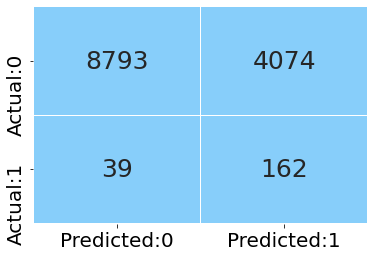

In [69]:
plot_cm(stack_model,xtest_scaled)

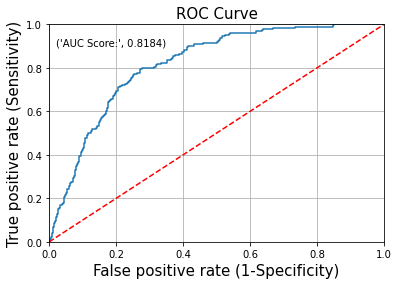

In [70]:
roc(stack_model,xtest_scaled)

In [72]:
base_learners2 = [('dt',DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, class_weight = 'balanced')),
                  ('knn',KNeighborsClassifier()),
                 ('gnb',GaussianNB())]

stack_model2 = StackingClassifier(estimators = base_learners2, final_estimator = LogisticRegression(class_weight = 'balanced'))


stack_model2.fit(xtrain_scaled,ytrain)
pred_stack2 = stack_model2.predict(xtest_scaled)
pred_train2 = stack_model2.predict(xtrain_scaled)

In [73]:
print(classification_report(ytrain,pred_train2))      ## train report

              precision    recall  f1-score   support

           0       1.00      0.72      0.83     51456
           1       0.04      0.80      0.08       814

    accuracy                           0.72     52270
   macro avg       0.52      0.76      0.46     52270
weighted avg       0.98      0.72      0.82     52270



In [74]:
print(classification_report(ytest,pred_stack2))        ## test report   

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     12867
           1       0.04      0.80      0.07       201

    accuracy                           0.69     13068
   macro avg       0.52      0.74      0.44     13068
weighted avg       0.98      0.69      0.80     13068



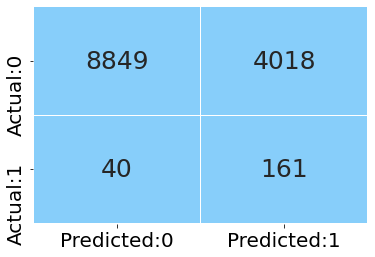

In [75]:
plot_cm(stack_model2,xtest_scaled)

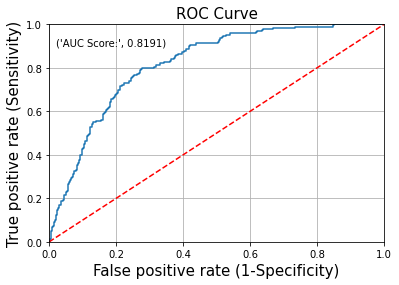

In [76]:
roc(stack_model2,xtest_scaled)

In [83]:
base_learners3 = [('dt',DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, class_weight = 'balanced')),
                 ('lg',LogisticRegression(class_weight = 'balanced'))]

stack_model3 = StackingClassifier(estimators = base_learners2, final_estimator = LogisticRegression(class_weight = 'balanced'))


stack_model3.fit(xtrain_scaled,ytrain)
pred_stack3 = stack_model3.predict(xtest_scaled)
pred_train3 = stack_model3.predict(xtrain_scaled)

In [84]:
print(classification_report(ytrain,pred_train3))      ## train report

              precision    recall  f1-score   support

           0       1.00      0.72      0.83     51456
           1       0.04      0.80      0.08       814

    accuracy                           0.72     52270
   macro avg       0.52      0.76      0.46     52270
weighted avg       0.98      0.72      0.82     52270



In [85]:
print(classification_report(ytest,pred_stack3))        ## test report   

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     12867
           1       0.04      0.80      0.07       201

    accuracy                           0.69     13068
   macro avg       0.52      0.74      0.44     13068
weighted avg       0.98      0.69      0.80     13068



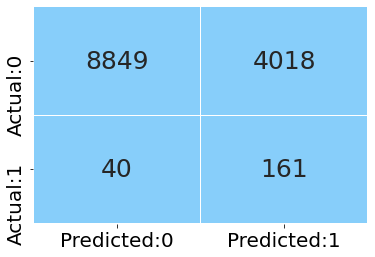

In [86]:
plot_cm(stack_model3,xtest_scaled)

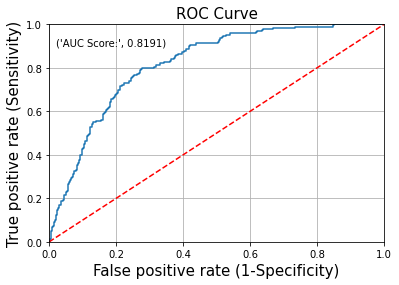

In [87]:
roc(stack_model3,xtest_scaled)

### Model Comparison and Validation

In [89]:
model_comparison = pd.DataFrame({'Model':['Logistic Regression','DecisionTree Classifier(tuned)','Stacking_1','Stacking_2','Stacking_3'],
                                'Recall(1)':[0.79,0.77,0.81,0.80,0.80],
                                'Overall Accuracy':[0.70,0.68,0.69,0.69,0.69],
                                'False Negatives':[43,46,39,40,40],
                                'ROC_AUC':[0.82,0.80,0.82,0.82,0.82]})

model_comparison = model_comparison.sort_values(by = 'Recall(1)', ascending = False)
model_comparison.head()

,Model,Recall(1),Overall Accuracy,False Negatives,ROC_AUC
2,Stacking_1,0.81,0.69,39,0.82
3,Stacking_2,0.80,0.69,40,0.82
4,Stacking_3,0.80,0.69,40,0.82
0,Logistic Regression,0.79,0.70,43,0.82
1,DecisionTree Classifier(tuned),0.77,0.68,46,0.80


In [96]:
models = (('LG', LogisticRegression(class_weight='balanced')),
         ('DTC', DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, class_weight = 'balanced')),
         ('Stack_1', stack_model),
         ('Stack_2', stack_model2),
         ('Stack_3', stack_model3))

LG: 0.791328 (0.040893)
DTC: 0.750106 (0.035519)
Stack_1: 0.751543 (0.030455)
Stack_2: 0.751543 (0.028290)
Stack_3: 0.751543 (0.028290)


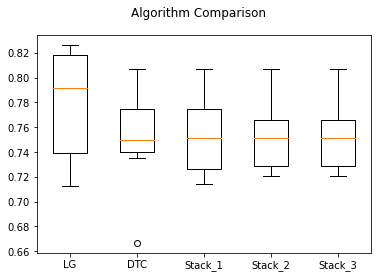

In [97]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, xtrain_scaled, ytrain, cv=kfold,scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()